Title: When to Use a Logarithmic Scale
Slug: when-use-log-scale
Summary: Explanation of when to use a log scale and use in a real-world example
Date: 2018-09-15 18:00  
Category: Data Visualizations
Subcategory: Best Practices
PostType: Tutorial
Tags: log scale
Keywords: when use log scale
Authors: Dan Friedman

In this tutorial, I'll explain the importance of log scales in data visualizations and provide a simple example.

Simply put, log scales can help visualize between large descrepancies of values on a single axis -  such as if you wanted to compare net worth of individuals worth \$40,000 and \$800,000,000.

### Import Modules

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as tick
% matplotlib inline

### Visualization Setup Code

In [3]:
sns.set(font_scale=1.4)

def format_ticks(tick_val, pos):
    if tick_val >= 1000000000:
        val = int(tick_val/1000000000)
        return '${:}B'.format(val)
    elif tick_val >= 1000000:
        val = int(tick_val/1000000)
        return '{:}M'.format(val)
    elif tick_val >= 1000:
        val = int(tick_val/1000)
        return '{:}K'.format(val)
    elif tick_val < 1000:
        return int(tick_val)
    else:
        return tick_val

### Linear Scale

In [4]:
x_values = list(range(1, 1001))
y_values = list(range(1, 1001))

In this plot below, I plot a simple function of `y=x`. So, for every input value of `x`, you get the same output value regarded as `y`. Here's the relationship of the first few values detailed in a table.

Input | Relationship | Output
--- | --- | ---
1 | x 1 | 1
2 | x 1 | 2
3 | x 1 | 3

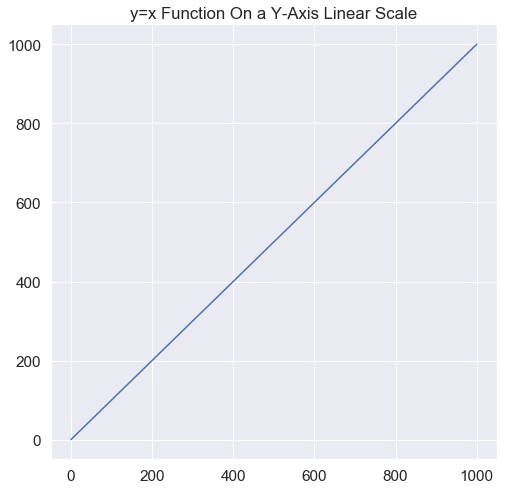

In [5]:
plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values)
plt.title("y=x Function On a Y-Axis Linear Scale");

### Log Scale

First off, what are logarithms? Logarithms help us answer the question: how many of one number do we multiply to get *another number*?

For example, how many 3s do we multiply to get 9? The answer is 3 x 3 = 9 so we had to multiple 3 *twice* to get 9.

This logic is powerful in helping us build a new scale to easily compare small and large values on a chart. 

The number line scale below by <a href='https://www.mathsisfun.com/definitions/logarithmic-scale.html' rel='nofollow'>Math is Fun</a> helps visualize the differences between a linear scale and logarithm scale.

![Log scale versus linear scale on a number line](https://www.mathsisfun.com/numbers/images/logarithmic-scale.svg)

Going back to our earlier example, below is the function `y=x` with the y-axis on a logarithmic scale.

All the same data points from above are plotted; however, notice how the y-axis tick values jump from `1` to `10` to `100` to `1K`.

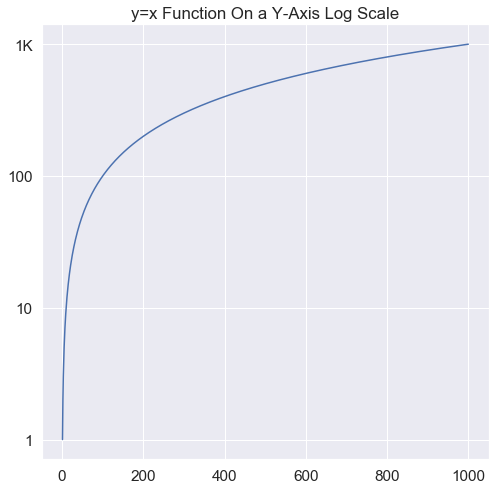

In [6]:
plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values, label='linear scale');
plt.yscale('log')
plt.title("y=x Function On a Y-Axis Log Scale")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(format_ticks));

### Real-Life Example: Visualizing Net Worth of People

I attended the University of Michigan for college.

Below, I randomly generated fake net worth data for 8 individuals. Since I went to Michigan, I also found the actual net worth data for 3 extremely wealthy alumni of the university including: Stephen M. Ross, Madonna and Tom Brady.

In [7]:
data ={'net_worth_us_dollars': [40000, 14000, 120000, 8300, 3200, 3500, 28000, 120000, 150000, 800000000, 7700000000, 180000000], 'name': ['Joe Smith', 'Jill Brown', 'Mark James', 'Sean Gopher', 'Mary Blake', 'Paul George', 'Melanie Smith', 'Joe Gold', 'Bill Brew', 'Madonna', 'Stephen M. Ross', 'Tom Brady']}
df = pd.DataFrame(data)

Below is a printout of the net worth of these 11 individuals sorted from most wealthy to least wealthy.

The wealthiest individual has a net worth of \$7,700,000,000 and the least wealthy individual has a net worth of \$3,200.

In [8]:
df.sort_values(by='net_worth_us_dollars', ascending=False)

,name,net_worth_us_dollars
10,Stephen M. Ross,7700000000
9,Madonna,800000000
11,Tom Brady,180000000
8,Bill Brew,150000
2,Mark James,120000
7,Joe Gold,120000
0,Joe Smith,40000
6,Melanie Smith,28000
1,Jill Brown,14000
3,Sean Gopher,8300


#### High Net Worth Individuals Bar Chart - Linear Scale

Here is a horizontal bar chart of the names of individuals and their net worth on a **linear** scale.

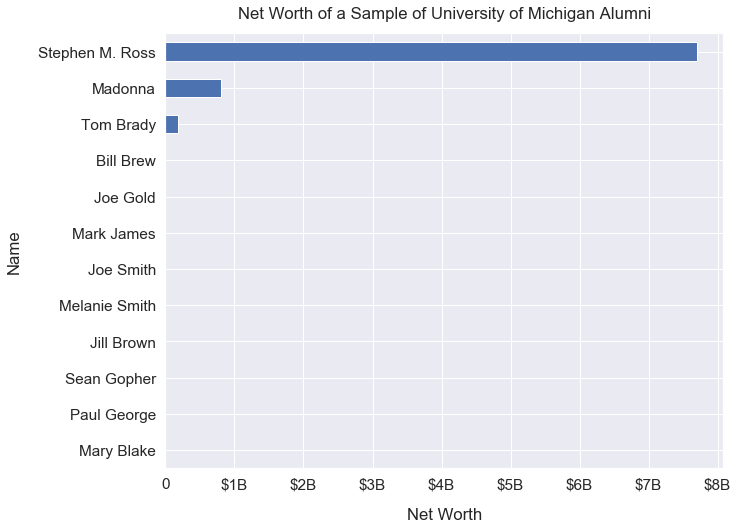

In [9]:
df.set_index('name')['net_worth_us_dollars'].sort_values().plot(kind='barh', figsize=(10, 8))
plt.xlabel("Net Worth", labelpad=16)
plt.ylabel("Name", labelpad=16)
plt.title("Net Worth of a Sample of University of Michigan Alumni", y=1.02)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(format_ticks));

It's glaringly obvious that we cannot see the net worth of the 8 least wealthy individuals. This is a big problem as it makes this graph uninterpretable. 

#### High Net Worth Individuals Bar Chart - Log Scale

Here is a horizontal bar chart of the names of individuals and their net worth on a **logarithmic** scale.

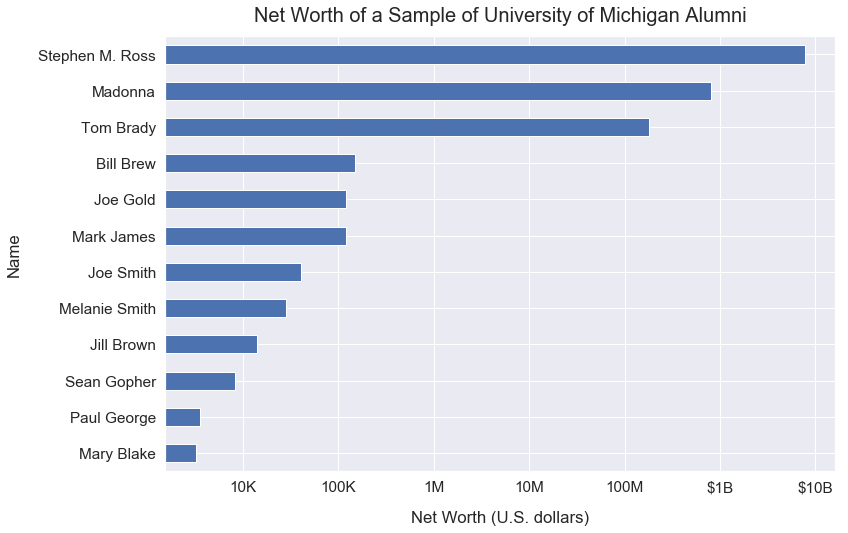

In [10]:
df.set_index('name')['net_worth_us_dollars'].sort_values().plot(kind='barh', figsize=(12, 8), logx=True)
plt.xlabel("Net Worth (U.S. dollars)", labelpad=16)
plt.ylabel("Name", labelpad=16)
plt.title("Net Worth of a Sample of University of Michigan Alumni", y=1.02, fontsize=20)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(format_ticks));

Look closely at how the scale on the x-axis changed.

This visualization is much better! We can now easily interpret the net worth of all 11 individuals on this visualization.